In [1]:
pip install -qq google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -qq -U watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

CPython 3.7.4
IPython 7.8.0

pandas 0.25.1
matplotlib 3.1.1
seaborn 0.9.0
google_play_scraper 0.0.2.5


In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [19]:
app_packages = [
    'com.takeaway.android',
    'com.ubercab.eats',
    'com.mcdonalds.mobileapp',
    'com.deliveroo.orderapp',
    'de.foodora.android',
    'com.hellofresh.androidapp',
    'de.burgerking.kingfinder'
]

In [20]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 7/7 [00:01<00:00,  4.25it/s]


In [21]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [22]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.takeaway.android",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>Order food online with your Android smartphone or tablet using the Thuisbezorgd.nl app. Super easy!</b>\r\n\r\n<b>Benefits of our app:</b>\r\n\u2714\ufe0f Ordering food online is just a few steps away.\r\n\u2714\ufe0f See the locations of all restaurants on a map (SD access needed for temporary storage of card).\r\n\u2714\ufe0f Pay safely with a credit card, iDEAL or PayPal.\r\n\u2714\ufe0f Log in with your account and (re)order easily.\r\n\u2714\ufe0f Add to your widgets to always have your favourite restaurants at hand.\r\n\u2714\ufe0f Would you rather pick up your food? Switch to the pickup option to see which restaurants allow this feature\r\n\r\nWant to order a tasty pizza, salad, burger or kebab? Our app lets you ord

  "recentChangesHTML": "Yay! We&#39;ve just made our app a little bit better again.<br><br>If you have important feedback, a question, or you just want to tell us a fun story, please don&#39;t hesitate to contact us at androidapp@takeaway.com.",
  "released": "Oct 28, 2010",
  "reviews": 19698,
  "score": 4.498864,
  "screenshots": [
    "https://lh3.googleusercontent.com/_ZUIEpRX6XJhfClV7BnqJ2IbwbfO8SE_OkAQ0SQXP-ir2naPA8vmjVlucsi8JSZqUg",
    "https://lh3.googleusercontent.com/00WNMQIvh2tt2lYWFTTn99mLgiBXB8hUtyXSeeRlqhvTk2sS6Xe1NteGCkTZRi3tBH6j",
    "https://lh3.googleusercontent.com/IujtHhuGM5qFdmNLN-bMrS4_3AhoQa29uxEgtE3y4kdhZYzfArq33X6l0SHY2BGCQw",
    "https://lh3.googleusercontent.com/I3gaMNIZnqyp9f_BybS1yIXa6wi-Q0CCa9WPL3riPK1ZCxSWKYMSBMKCsSZvR9mZpA4",
    "https://lh3.googleusercontent.com/8SrMEYihRexX3Z5O5RRPAIVDW0vqP8uFiC7NlhZ71qR4M0qMZwBrr_pKGIQi6d3dVw",
    "https://lh3.googleusercontent.com/I0oR7343pE_g8F7Q7C49N4z5eu2DpeaXJOTfkid15S1nKYGAMyEnQ_2-5gMq-38jAJs",
    "https:/

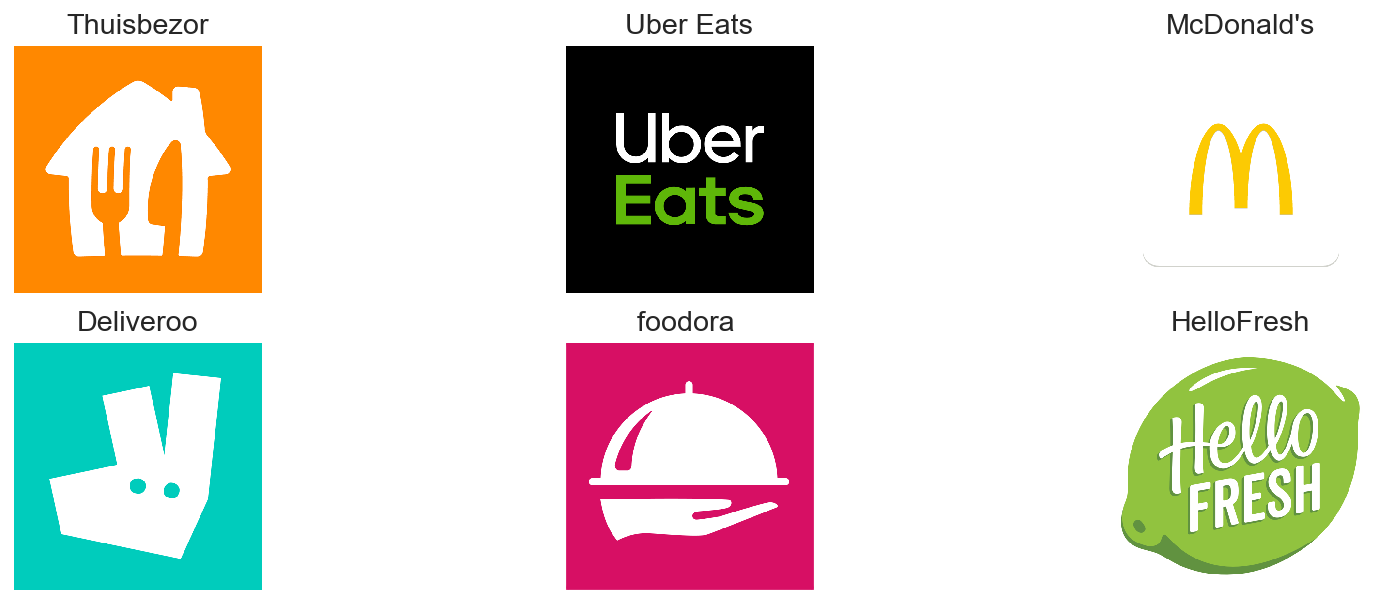

In [23]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [24]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [25]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 7/7 [00:27<00:00,  3.97s/it]


In [26]:
print_json(app_reviews[0])

{
  "appId": "com.takeaway.android",
  "at": "2020-03-22 19:04:07",
  "content": "Rarely has an order gone smoothly. Seemingly buggy backend.",
  "repliedAt": "2020-03-23 09:32:57",
  "replyContent": "Hi,\n\nThank you for your review.\n\nWe have had some issues regarding hackers this last week. Our system is still recovering from this. If something went wrong with your order we want to ask you to sent a message to info@thuisbezorgd.nl. Our apologies for the inconvenience.\n\nKind regards,\nDemi - Team Thuisbezorgd.nl",
  "reviewCreatedVersion": "6.11.4",
  "reviewId": "gp:AOqpTOGeqY9g7FZfEHGkCqD0k-hR3-CicJG87jnLspXJBiHEbMcCgU7GNx0Hd5wq8-MTjG-oteDFcrnIHux4mA",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 1,
  "userImage": "https://lh3.googleusercontent.com/a-/AOh14GjKHT4fxk9zX3aPwqVpezM3eTySJDiI0lLuaOw5Ow",
  "userName": "T D"
}



In [27]:
len(app_reviews)

7786

In [28]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [33]:
df = pd.read_csv('reviews.csv', lineterminator='\n')
df.shape
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId\r
0,gp:AOqpTOGeqY9g7FZfEHGkCqD0k-hR3-CicJG87jnLspX...,T D,https://lh3.googleusercontent.com/a-/AOh14GjKH...,Rarely has an order gone smoothly. Seemingly b...,1,1,6.11.4,2020-03-22 19:04:07,"Hi,\n\nThank you for your review.\n\nWe have h...",2020-03-23 09:32:57,most_relevant,com.takeaway.android\r
1,gp:AOqpTOHkUsuQrEbTGfEO5Dy-gY6Q1z7tElixLmWVDQa...,A Google user,https://lh3.googleusercontent.com/EGemoI2NTXmT...,Useless the website is better. A failure in co...,1,0,6.11.4,2020-04-03 13:02:26,"Dear customer, \n\nWe are sorry to hear you ar...",2020-04-03 23:54:12,most_relevant,com.takeaway.android\r
2,gp:AOqpTOEEvOL5iiQWpIimXwAC7ALE7zA6ndV3bqXdWFr...,Jesse Dodde,https://lh3.googleusercontent.com/a-/AOh14GgI2...,The app doesn't do payment well. Paying using ...,1,1,6.9.0,2020-01-11 16:42:31,"Dear Jesse,\n\nThank you for your review.\n\nW...",2020-01-12 10:19:12,most_relevant,com.takeaway.android\r
3,gp:AOqpTOGnUVe95cFUBtGeU1SC05i_-Z7wZwF5odJpvcp...,Sedat Sever,https://lh3.googleusercontent.com/a-/AOh14GjVe...,Vouchers and discounts do not work as advertis...,1,4,6.9.0,2020-01-01 18:33:32,"Dear Sedat, \n\nThank you for the review. We u...",2020-01-01 21:07:33,most_relevant,com.takeaway.android\r
4,gp:AOqpTOESd2tXyG0GshRcttdpMqv_0GrLxWmBrESGxWH...,Floran Felen,https://lh3.googleusercontent.com/-s1piPDEOQZ8...,"Can't sign in, app keeps stopping and restarti...",1,8,6.9.0,2020-02-04 05:36:00,"Dear Floran, \n\nThank you for your feedback. ...",2019-01-07 09:36:12,most_relevant,com.takeaway.android\r
